# Feed Forward Neural Network
## Major Used Concepts
### 1. MNIST Dataset
### 2. Transformation using DataLoader
### 3. Multilayer Neural Network
### 4. Activation Function
### 5. Loss Function and Optimizer
### 6. Batch Training
### 7. Model Evaluation
### 8. GPU configuration (optional)

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# set important parameters
input_size = 784 # because MNIST image size will be 28x28
hidden_size = 100
n_classes = 10 # because MNIST data will have total 10 classes
l_rate = 0.001
batch_size = 100
n_epochs = 2

In [5]:
# MNIST data & transformation of data into tensor
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
print(train_data, test_data)

<class 'torchvision.datasets.mnist.MNIST'> Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [8]:
# load batchsize of 100
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)


In [11]:
for i in test_loader:
    print(i[0].shape,i[1].shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([1

In [82]:
# test and have look of 1 batch of data
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)
print(samples[0])

torch.Size([100, 1, 28, 28]) torch.Size([100])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          

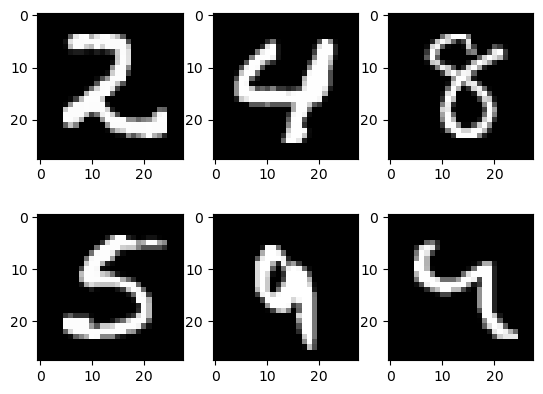

In [83]:
# plot some samples
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [84]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, n_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, n_classes)
        
    def forward(self, inputs):
        outputs = self.linear1(inputs)
        outputs = self.relu(outputs)
        outputs = self.linear2(outputs)
        return outputs

In [85]:
model = NeuralNet(input_size, hidden_size, n_classes)

In [86]:
# loss and optimizer
criterion =  nn.CrossEntropyLoss() # nn.CrossEntropyLoss() automaticsally applies Softmax
optimizer = torch.optim.Adam(model.parameters(), lr=l_rate)

In [87]:
# training loop
n_steps = len(train_loader)
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape -> 100, 1, 28, 28
        # required resized shape -> 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        out = model(images)
        loss = criterion(out, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {n_epochs}, step {i+1} / {n_steps}, loss = {loss.item():.4f}')

epoch 1 / 2, step 100 / 600, loss = 0.4123
epoch 1 / 2, step 200 / 600, loss = 0.3616
epoch 1 / 2, step 300 / 600, loss = 0.2044
epoch 1 / 2, step 400 / 600, loss = 0.2647
epoch 1 / 2, step 500 / 600, loss = 0.3115
epoch 1 / 2, step 600 / 600, loss = 0.2143
epoch 2 / 2, step 100 / 600, loss = 0.2618
epoch 2 / 2, step 200 / 600, loss = 0.2687
epoch 2 / 2, step 300 / 600, loss = 0.1295
epoch 2 / 2, step 400 / 600, loss = 0.3394
epoch 2 / 2, step 500 / 600, loss = 0.1548
epoch 2 / 2, step 600 / 600, loss = 0.0619


In [88]:
# testing model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        # origin shape -> 100, 1, 28, 28
        # required resized shape -> 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        out = model(images)
        
        # value, index
        _, predictions = torch.max(out, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    accuracy = 100.0 * n_correct / n_samples
    print(f'accuracy = {accuracy}')

accuracy = 95.29
